# Import des outils / jeu de données

In [26]:
from src.utils import init_notebook
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
init_notebook()

In [8]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)
event_times = df["day_succ"]
event_observed = df["Status"]

event_times_no_censoring = df["day_succ"][df["Status"] == 1]
event_observed_no_censoring = df["Status"][df["Status"] == 1]

# Régression linéaire

In [12]:
X = df.drop(['day_succ', 'Status'], axis=1)
y = event_times

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [25]:
# Interpret linear regression weights

coefficients_df = pd.DataFrame({
    'Variable': ['Intercept'] + [col_name for col_name in df.columns[2:]],
    'Coefficient': [linear.intercept_] + linear.coef_.tolist()
})
coefficients_df

,Variable,Coefficient
0,Intercept,2.726208e+13
1,cat1,-2.726208e+13
2,cat2,-2.726208e+13
3,cat3,-2.726208e+13
4,cat4,-2.726208e+13
5,cat5,-2.726208e+13
6,cat6,-2.726208e+13
7,cat7,-2.726208e+13
8,cat8,-2.726208e+13
9,cat9,-2.726208e+13


In [27]:
# Evaluate model prediction capacity
y_pred = linear.predict(X_test)
linear_mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f"{linear_mse =}")

linear_mse =137.5264289353422


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution des résidus')

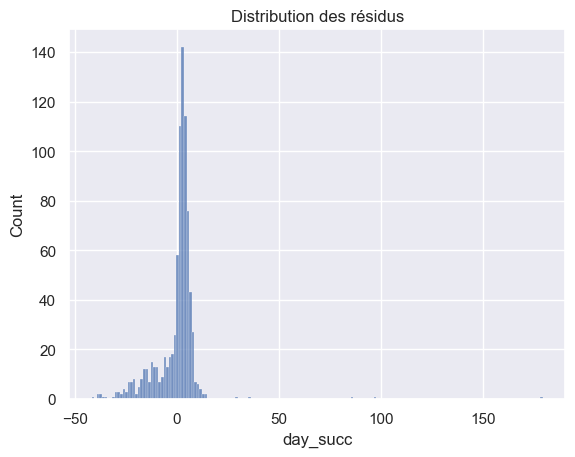

In [35]:
# Calculate residuals
residuals_linear = y_test - y_pred

# Determine residuals distribution
sns.histplot(residuals_linear)
plt.title("Distribution des résidus")

La régression linéaire semble adaptée étant donné que les résidus suivent une loi normale.